# Prototype Climate Impact Lab Interface

## Workspace Setup

Import some python modules

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import prototype

## Connect to the API

Authenticate with the [prototype] API, and define how you want to use the system

In [2]:
api = prototype.ClimateImpactLabDataAPI(
    username='mdelgado', 
    password='*********')

api.configure(sample='median', location='OSDC', priority='low')

API configuration updated


## Retrieve formatted Climate Impact Lab variables

In [3]:
# mortality regression parameters
alpha  = api.get_variable('alpha')
gamma1 = api.get_variable('gamma1')
gamma2 = api.get_variable('gamma2')
gamma3 = api.get_variable('gamma3')

# GCP-wide socioeconomic parameters
avg_days_per_bin = api.get_variable('avg_days_per_bin')
gdp_per_capita   = api.get_variable('gdppc')
pop_density      = api.get_variable('popdens')

# Climate variables
temp = api.get_variable('temp')

In [4]:
# Get variable attributes
temp.attrs

OrderedDict([('symbol', 'T'), ('description', 'NASA downscaled climate data')])

## Do math with Impact Lab variables

In [5]:
# From the NAS mortality presentation...

betahat = alpha+gamma1*avg_days_per_bin+gamma2*(gdp_per_capita.ln())+gamma3*(pop_density.ln())

In [6]:
# define how your new variable should look
betahat.symbol = '\\hat{{\\beta}}'

In [7]:
# show LaTeX for the math we just did
betahat.display()

<IPython.core.display.Latex object>

In [8]:
# Also, show the result of the calculation
betahat.value

<xarray.DataArray (bins: 12, adm2: 24999, time: 100)>
array([[[ 0.09017683,  0.18475962, -0.94357073, ..., -0.36673131,
         -2.6089736 , -0.71793438],
        [ 0.87691344,  0.19890121, -1.22601148, ...,  0.56981271,
         -1.75527971, -0.09207837],
        [ 0.31277619,  0.03858758, -1.90205572, ..., -0.68585149,
          0.06798176, -0.28893767],
        ..., 
        [-0.61769034, -0.35176133, -0.24078675, ..., -0.65495756,
         -2.14458412,  0.18328238],
        [ 0.13608491,  0.47363624, -0.25684759, ...,  0.05058051,
          0.51481122, -0.60408378],
        [-0.07261482,  0.18441063, -0.92870511, ...,  0.29130031,
         -0.26093867,  0.31895735]],

       [[ 0.37801183,  0.45173678, -0.79960845, ..., -0.54495389,
         -1.2611046 ,  0.01349514],
        [ 0.61424209,  0.44998586, -2.15933161, ...,  0.46394746,
         -1.13031081,  0.56222517],
        [ 0.66125806,  0.52721091, -2.02736239, ...,  0.0428862 ,
         -0.05269028,  0.1702951 ],
        ...,

## Use functions from xArray and the rest of python

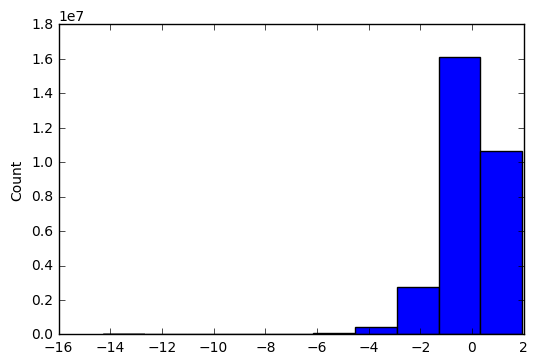

In [12]:
ax = betahat.value.plot()
plt.show(ax)

## The next step in the calculation...

In [16]:
# simplify the representation of betahat:
betahat.symbolic = '\\hat{{\\beta}}'

In [17]:
# sum betahat*temp across bins
mortality = (betahat * temp).sum(dim='bins')

# declare a symbol for mortality
mortality.symbol = 'M'

In [18]:
mortality.display()

<IPython.core.display.Latex object>

Note that the dimensionality of mortality is less than beta and temp in the LaTeX and data:

In [19]:
mortality.value

<xarray.DataArray (adm2: 24999, time: 100)>
array([[ -3.48348524,   1.451602  ,  -3.70583551, ...,   4.6301065 ,
          3.21251702,   3.04591607],
       [  3.07825481,  -0.96487393,   1.2278948 , ...,   0.82126926,
          1.4135644 ,   1.81819439],
       [ -0.227317  ,   1.96148661,  -6.57299847, ...,  -2.72654544,
          0.83018776,  -5.3444067 ],
       ..., 
       [  1.4770409 ,   2.46424362,  -1.2657929 , ...,   2.00093775,
          0.73129872,  -9.99521669],
       [ -1.83440384,   0.61295812,  -2.40011966, ..., -30.75147565,
         -0.30482349,  -2.93447264],
       [  2.67929975,  -0.31044928,   1.03214597, ..., -16.01299561,
          3.19467735,  -8.37779217]])
Coordinates:
  * adm2     (adm2) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Attributes:
    symbol: M

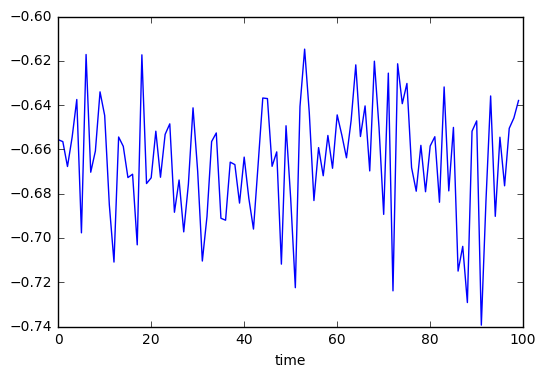

In [23]:
ax = mortality.value.mean(dim='adm2').plot()
plt.show(ax)